# Astronaut Database Exploration
## by Hani Jubail

## Preliminary Wrangling

>This database contains publically available information about all astronauts who participated in space missions before 15 January 2020 collected from NASA, Roscosmos, and fun-made websites. The provided information includes full astronaut name, sex, date of birth, nationality, military status, a title and year of a selection program, and information about each mission completed by a particular astronaut such as a year, ascend and descend shuttle names, mission and extravehicular activity (EVAs) durations.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style="ticks")


%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
astronauts = pd.read_csv("astronauts.csv")


In [3]:
# high-level overview of data shape and composition
print(astronauts.shape)
print(astronauts.info())
print(astronauts.dtypes)

(1277, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277 entries, 0 to 1276
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1277 non-null   int64  
 1   number                    1277 non-null   int64  
 2   nationwide_number         1277 non-null   int64  
 3   name                      1277 non-null   object 
 4   original_name             1272 non-null   object 
 5   sex                       1277 non-null   object 
 6   year_of_birth             1277 non-null   int64  
 7   nationality               1277 non-null   object 
 8   military_civilian         1277 non-null   object 
 9   selection                 1272 non-null   object 
 10  year_of_selection         1277 non-null   int64  
 11  mission_number            1277 non-null   int64  
 12  total_number_of_missions  1277 non-null   int64  
 13  occupation                1277 non-null   object 
 1

In [4]:
pd.set_option("display.max_columns", 24)
astronauts.head(10)

,id,number,nationwide_number,name,original_name,sex,year_of_birth,nationality,military_civilian,selection,year_of_selection,mission_number,total_number_of_missions,occupation,year_of_mission,mission_title,ascend_shuttle,in_orbit,descend_shuttle,hours_mission,total_hrs_sum,field21,eva_hrs_mission,total_eva_hrs
0,1,1,1,"Gagarin, Yuri",ГАГАРИН Юрий Алексеевич,male,1934,U.S.S.R/Russia,military,TsPK-1,1960,1,1,pilot,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0,0.0,0.0
1,2,2,2,"Titov, Gherman",ТИТОВ Герман Степанович,male,1935,U.S.S.R/Russia,military,TsPK-1,1960,1,1,pilot,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0,0.0,0.0
2,3,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 1,1959,1,2,pilot,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0,0.0,0.0
3,4,3,1,"Glenn, John H., Jr.","Glenn, John H., Jr.",male,1921,U.S.,military,NASA Astronaut Group 2,1959,2,2,PSP,1998,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0,0.0,0.0
4,5,4,2,"Carpenter, M. Scott","Carpenter, M. Scott",male,1925,U.S.,military,NASA- 1,1959,1,1,Pilot,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0,0.0,0.0
5,6,5,2,"Nikolayev, Andriyan",НИКОЛАЕВ Андриян Григорьевич,male,1929,U.S.S.R/Russia,military,TsPK-1,1960,1,2,pilot,1962,Vostok 3,Vostok 3,Vostok 3,Vostok 3,94.00,519.33,0,0.0,0.0
6,7,5,2,"Nikolayev, Andriyan",НИКОЛАЕВ Андриян Григорьевич,male,1929,U.S.S.R/Russia,military,TsPK-2,1960,2,2,pilot,1970,Soyuz 9,Soyuz 9,Soyuz 9,Soyuz 9,424.00,519.33,0,0.0,0.0
7,8,6,4,"Popovich, Pavel",ПОПОВИЧ Павел Романович,male,1930,U.S.S.R/Russia,military,TsPK-1,1960,1,2,pilot,1962,Vostok 4,Vostok 4,Vostok 4,Vostok 4,70.93,448.45,0,0.0,0.0
8,9,6,4,"Popovich, Pavel",ПОПОВИЧ Павел Романович,male,1930,U.S.S.R/Russia,military,TsPK-2,1960,2,2,commander,1974,Soyuz 14,Soyuz 14,Soyuz 14,Soyuz 14,377.00,448.45,0,0.0,0.0
9,10,7,3,"Schirra, Walter M., Jr.","Schirra, Walter M., Jr.",male,1923,U.S.,military,1959 NASA group 1,1959,1,3,pilot,1962,Mercury-Atlas 8,Mercury-Atlas 8,Mercury-Atlas 8,Mercury-Atlas 8,9.22,295.20,0,0.0,0.0


### What is the structure of your dataset?

>  The astronauts database contains data about 1277 astronauts with 24 features like (name, original name, sex, year of birth, nationality, background (military/civilian), selection, year of selection, mission number, total number of missions, year of mission and other features. The variables are numeric and strings for the most part with some dates and categorical data like names of the missions.
### What is/are the main feature(s) of interest in your dataset?

> The most interesting features in the dataset are the gender data and other features like nationality, background, occupation, time spent on the missions.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Other features will help in the investigation will be like year of birth and some engineered features like age beside the time spent inside a space shuttle and outside space shuttle.

## Univariate Exploration

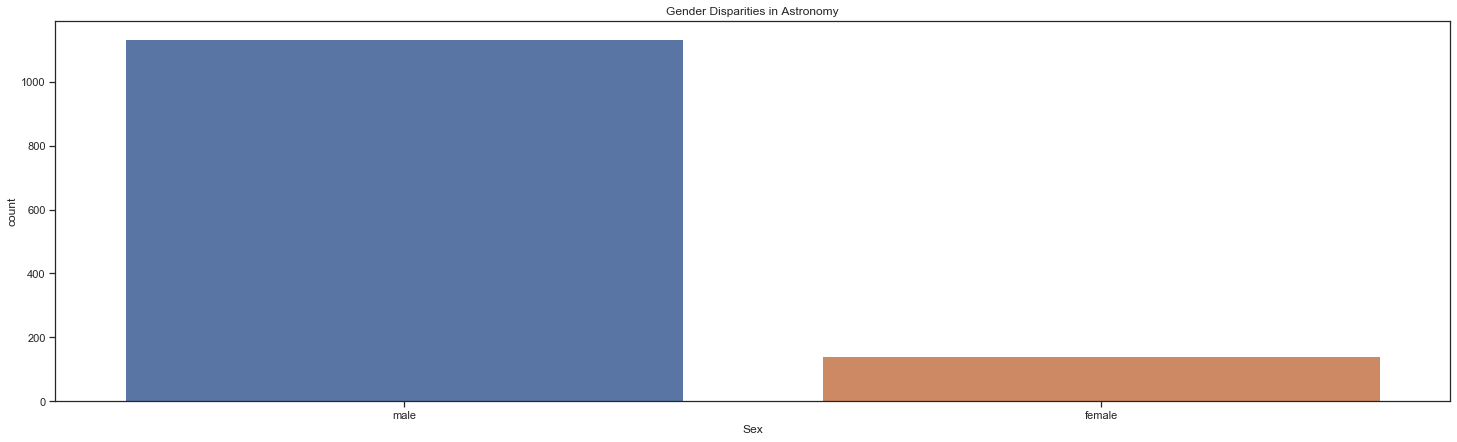

In [5]:
plt.figure(figsize=(25,7))
sb.countplot(x="sex", y=None, data=astronauts).set(title = "Gender Disparities in Astronomy",
                                                   xlabel = "Sex");

In [6]:
astronauts["sex"].value_counts()

male      1134
female     143
Name: sex, dtype: int64

In [7]:
astronauts["sex"].value_counts(normalize = True)*100

male      88.801879
female    11.198121
Name: sex, dtype: float64

The vast majority of astronauts are males with 1134 male astronauts 88.8% compared to just 143 female astronauts 11.1%.

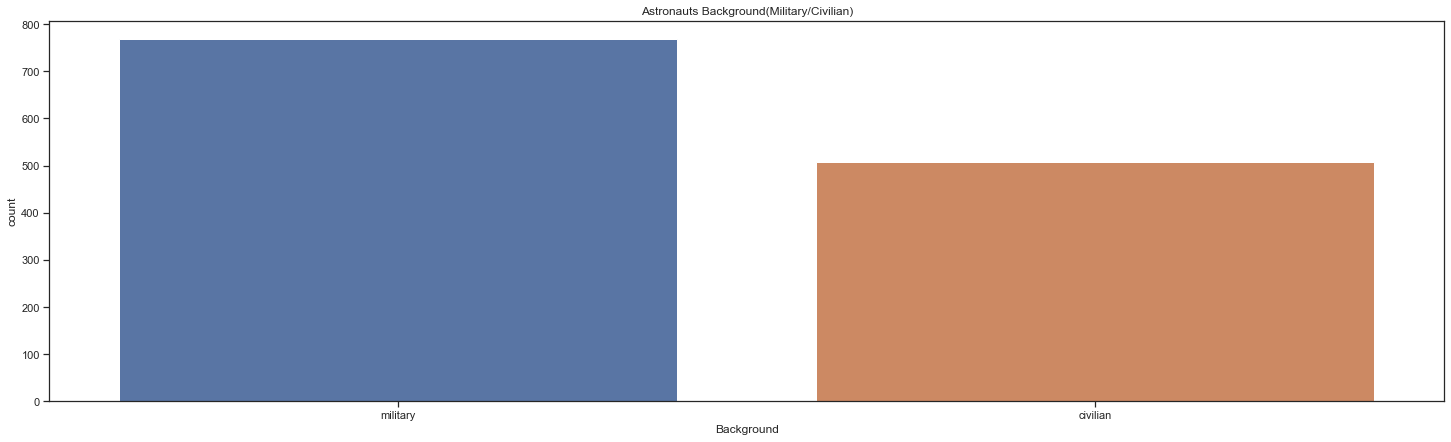

In [8]:
plt.figure(figsize=(25,7))
sb.countplot(x = "military_civilian",data = astronauts).set(title = "Astronauts Background(Military/Civilian)",
                                                            xlabel = "Background");

In [9]:
astronauts["military_civilian"].value_counts(normalize = True)*100

military    60.219264
civilian    39.780736
Name: military_civilian, dtype: float64

60% of astronauts have a military background and 40% are civilians.


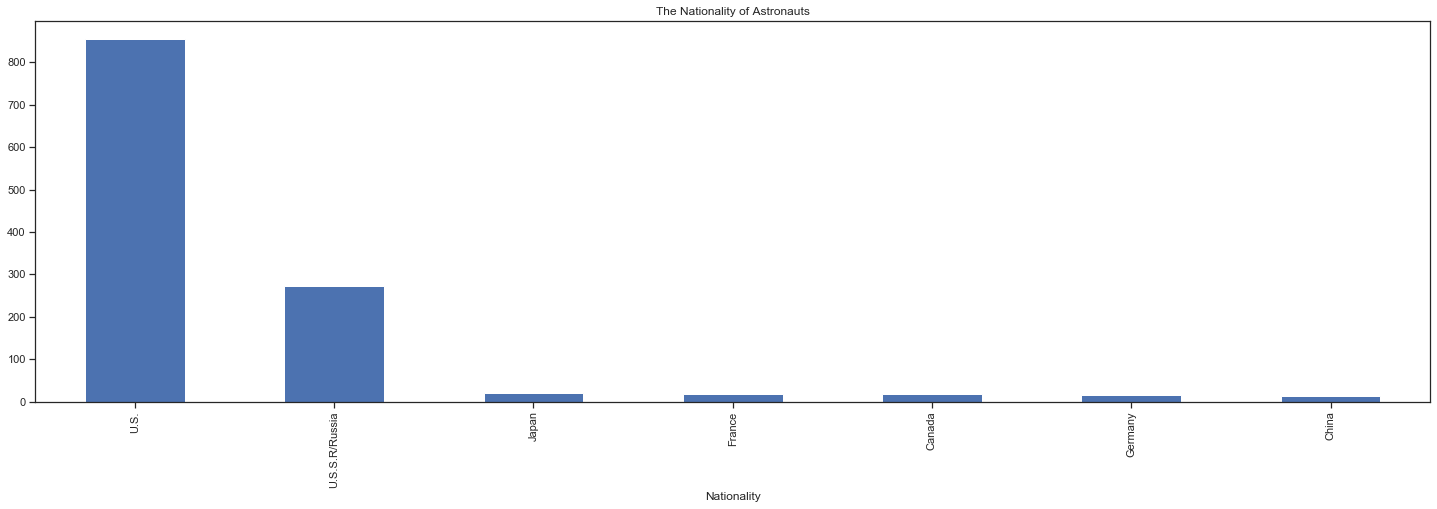

In [10]:
astronauts["nationality"].value_counts().nlargest(7).plot(kind = "bar",
                                                          figsize=(25,7)).set(title = "The Nationality of Astronauts",
                                                                              xlabel = "Nationality");

The U.S. Takes the first spot for the country with the largest number of astronauts followed by U.S.S.R(Russia)For the second spot.

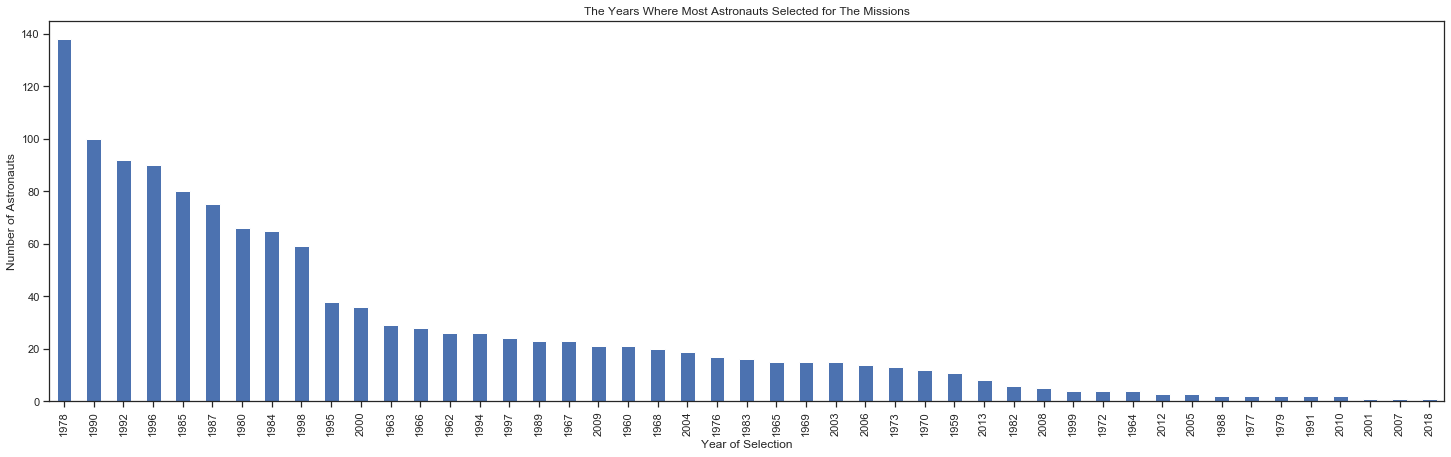

In [11]:
astronauts["year_of_selection"].value_counts().plot(kind = "bar",
                                                    figsize=(25,7)).set(title = "The Years Where Most Astronauts Selected for The Missions",
                                                                        xlabel = "Year of Selection",
                                                                        ylabel = "Number of Astronauts");

Year of selection program is the year were people selected to train for a human spaceflight program to command, pilot, or serve as a crew member of a spacecraft. 
And from the plot above the year were most astronauts were selected was 1978 and the rest of astronauts were select in the following years in the 90's.

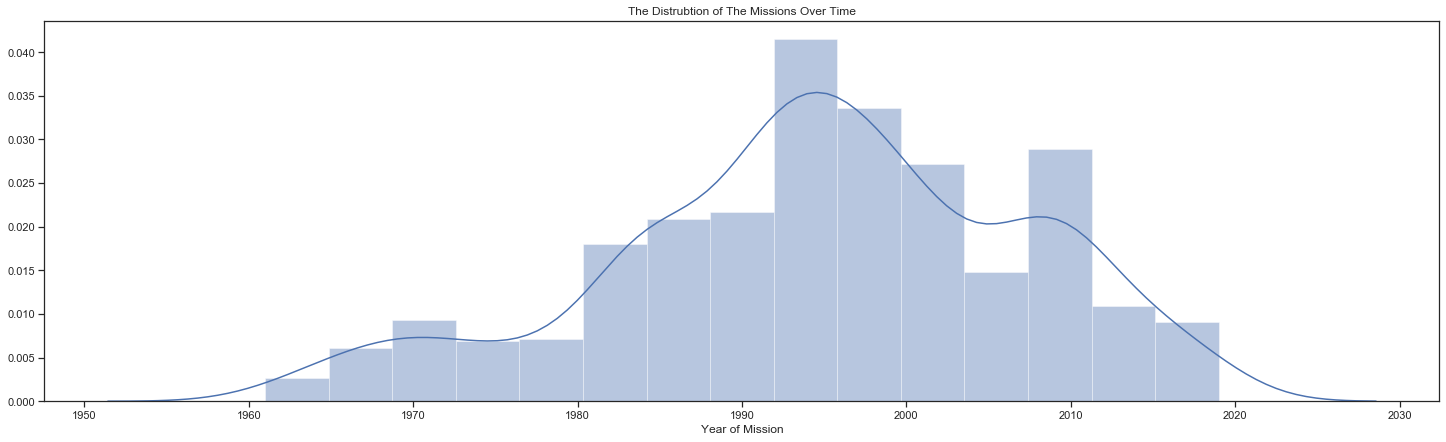

In [12]:
plt.figure(figsize=(25,7))
sb.distplot(astronauts["year_of_mission"],bins = 15).set(title = "The Distrubtion of The Missions Over Time",
                                                         xlabel = "Year of Mission");

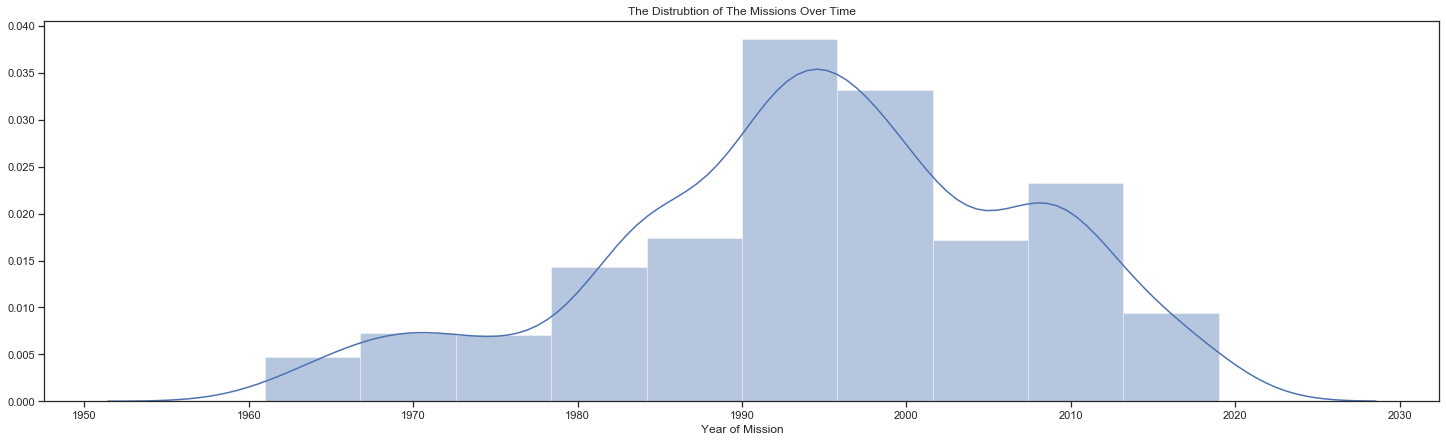

In [13]:
plt.figure(figsize=(25,7))
sb.distplot(astronauts["year_of_mission"],bins = 10).set(title = "The Distrubtion of The Missions Over Time",
                                                         xlabel = "Year of Mission");

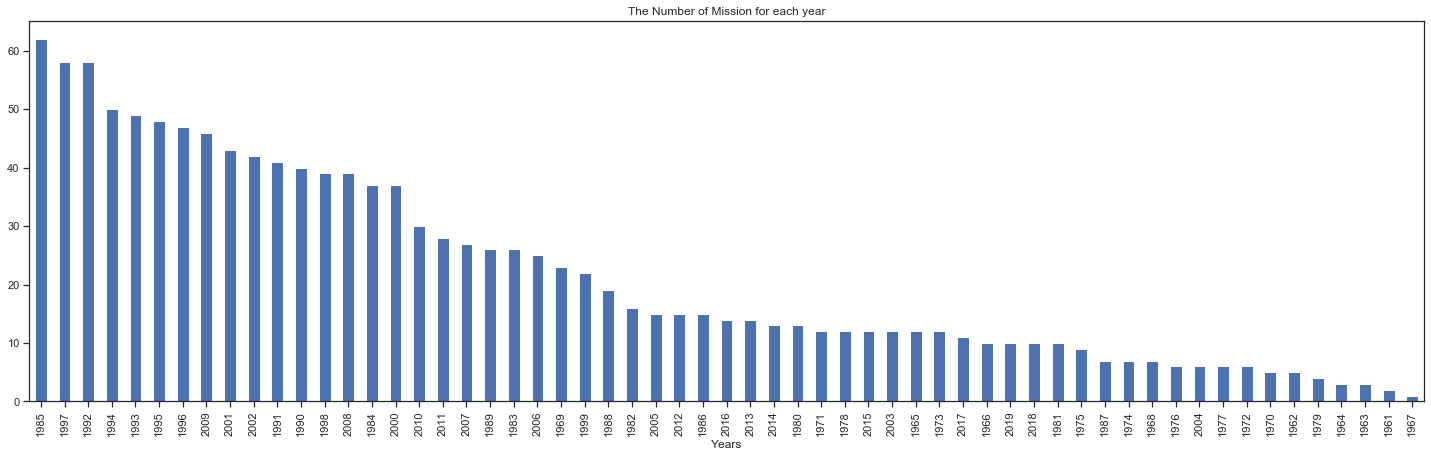

In [14]:
astronauts["year_of_mission"].value_counts().plot(kind = "bar",
                                                  figsize=(25,7)).set(title = "The Number of Mission for each year",
                                                                      xlabel = "Years");

The year with most missions to space was 1985, however the period between 1980 and 1999 is the period with most missions to space.

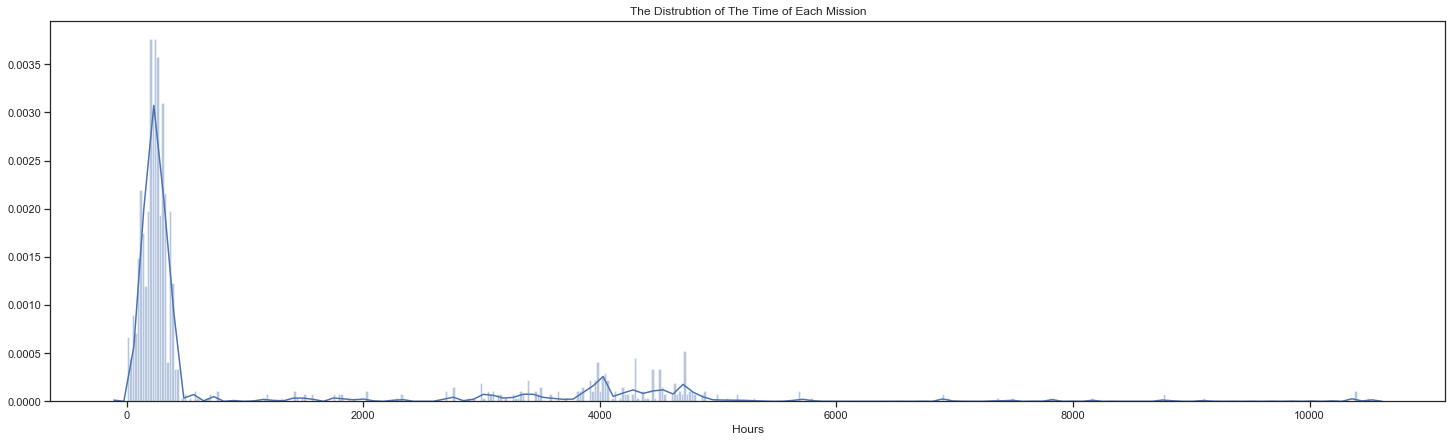

In [15]:
plt.figure(figsize=(25,7))
sb.distplot(astronauts["hours_mission"],bins = 500).set(title = "The Distrubtion of The Time of Each Mission",
                                                        xlabel = "Hours");

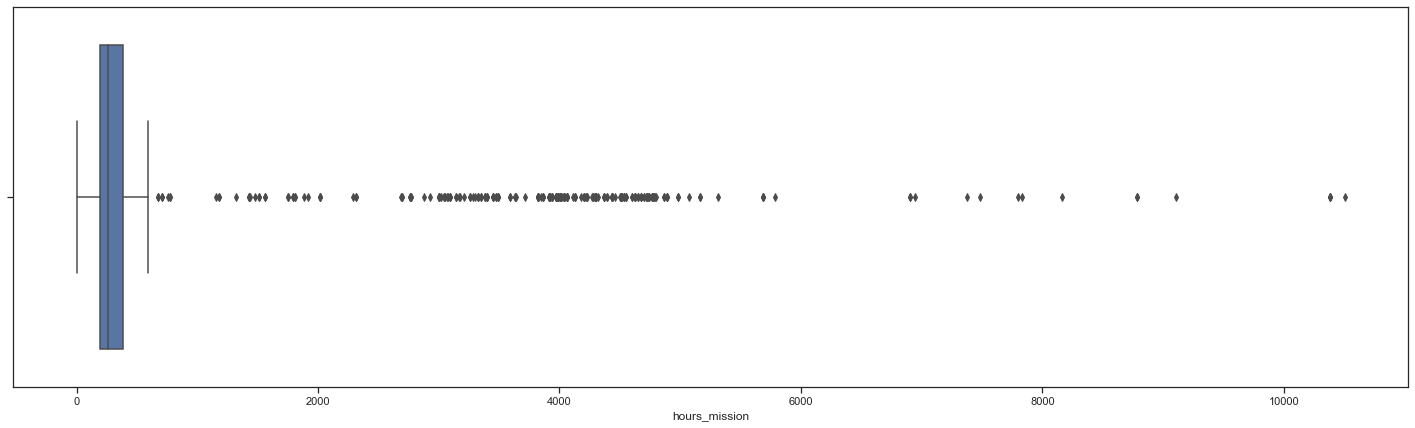

In [16]:
plt.figure(figsize=(25,7))
sb.boxplot(astronauts["hours_mission"]);

In [17]:
astronauts["hours_mission"].describe()

count     1277.000000
mean      1050.883984
std       1714.791959
min          0.000000
25%        190.030000
50%        261.000000
75%        382.000000
max      10505.000000
Name: hours_mission, dtype: float64

The distribution of the amount of time for each astronaut per mission is right skewed with a long tail and a lot of outliers.
But we can see that most missions on average are around 261 hours, and the longest mission was 10505 hours long.

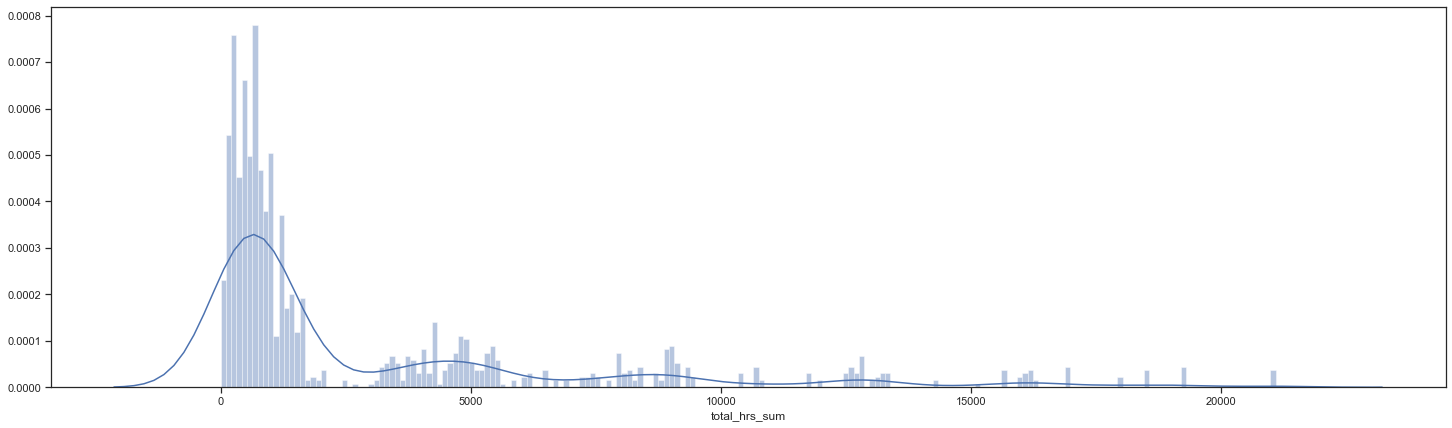

In [18]:
plt.figure(figsize=(25,7))
sb.distplot(astronauts["total_hrs_sum"],bins = 200);

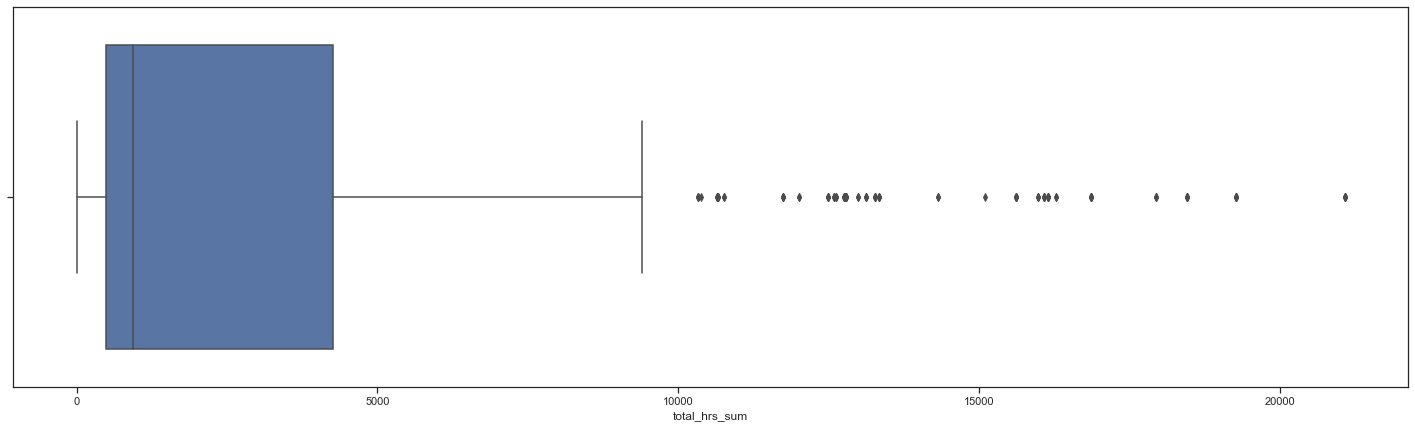

In [19]:
plt.figure(figsize=(25,7))
sb.boxplot(astronauts["total_hrs_sum"]);

In [20]:
astronauts["total_hrs_sum"].describe()

count     1277.000000
mean      2968.341410
std       4214.715104
min          0.610000
25%        482.000000
50%        932.000000
75%       4264.000000
max      21083.520000
Name: total_hrs_sum, dtype: float64

The total amount of time  each astronaut spent in the missions is right skewed with a long tail and some outliers.
And we can see that some astronauts spent a lot of time in space for many missions combined, with the longest total amount of time was 21083 hours and the median is 932 hours for each astronaut.

In [21]:
astronauts["occupation"].value_counts()

MSP                        498
commander                  315
pilot                      196
flight engineer            192
PSP                         59
Other (space tourist)        5
Flight engineer              4
Other (Space tourist)        3
Space tourist                2
Other (Journalist)           1
Pilot                        1
spaceflight participant      1
Name: occupation, dtype: int64

In [22]:
astronauts["occupation"].replace("pilot","Pilot",inplace = True)
astronauts["occupation"].replace("MSP","Mission Specialist",inplace = True)
astronauts["occupation"].replace("flight engineer","Flight Engineer",inplace = True)
astronauts["occupation"].replace("Flight engineer","Flight Engineer",inplace = True)
astronauts["occupation"].replace("PSP","Payload specialist",inplace = True)
astronauts["occupation"].replace("commander","Commander",inplace = True)
astronauts["occupation"].replace("Other (space tourist)","Other(Space Tourist)",inplace = True)
astronauts["occupation"].replace("Other (Space tourist)","Other(Space Tourist)",inplace = True)
astronauts["occupation"].replace("Space tourist","Other(Space Tourist)",inplace = True)
astronauts["occupation"].replace("spaceflight participant","Spaceflight Participant",inplace = True)

In [23]:
astronauts["occupation"].value_counts()

Mission Specialist         498
Commander                  315
Pilot                      197
Flight Engineer            196
Payload specialist          59
Other(Space Tourist)        10
Spaceflight Participant      1
Other (Journalist)           1
Name: occupation, dtype: int64

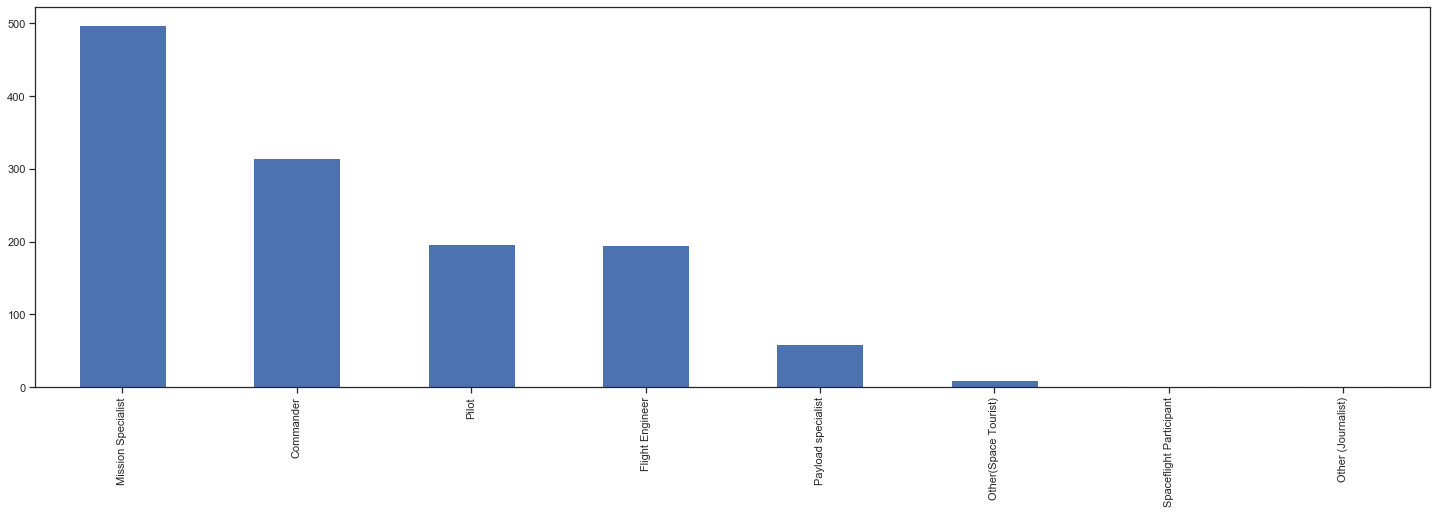

In [24]:
astronauts["occupation"].value_counts().plot(kind = "bar",figsize=(25,7));

Most astronauts are Mission Specialists, Commanders, Pilots and Flight engineers.

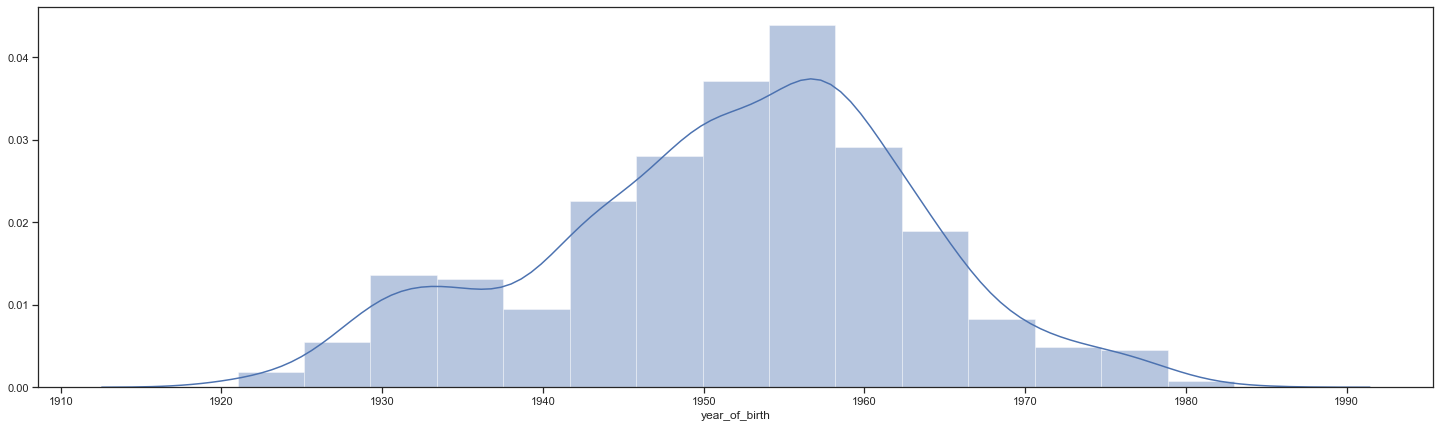

In [25]:
plt.figure(figsize=(25,7))
sb.distplot(astronauts["year_of_birth"],bins = 15);

The majority of astronauts were born in the period between 1945 and 1965.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the number of missions each year is slightly left skewed, however most missions were in the period between 1980 and 1999 is the period with most missions to space. 

> The distribution of the amount of time for each astronaut per mission is very skewed to the right with a long tail and a lot of outliers.
But we can see that most missions on average are around 261 hours, and the longest mission was 10505 hours long.

> The distribution of the year of birth is slightly left skewed but we can conclude that the majority of astronauts were born in the period between 1945 and 1965.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Nothing is unusual since we can expect to see skewed distributions, however, I did some modifications to the bins in the year of birth and mission year to get better results and insight into the distributions and I made some boxplots to see the outliers clearly.

## Bivariate Exploration


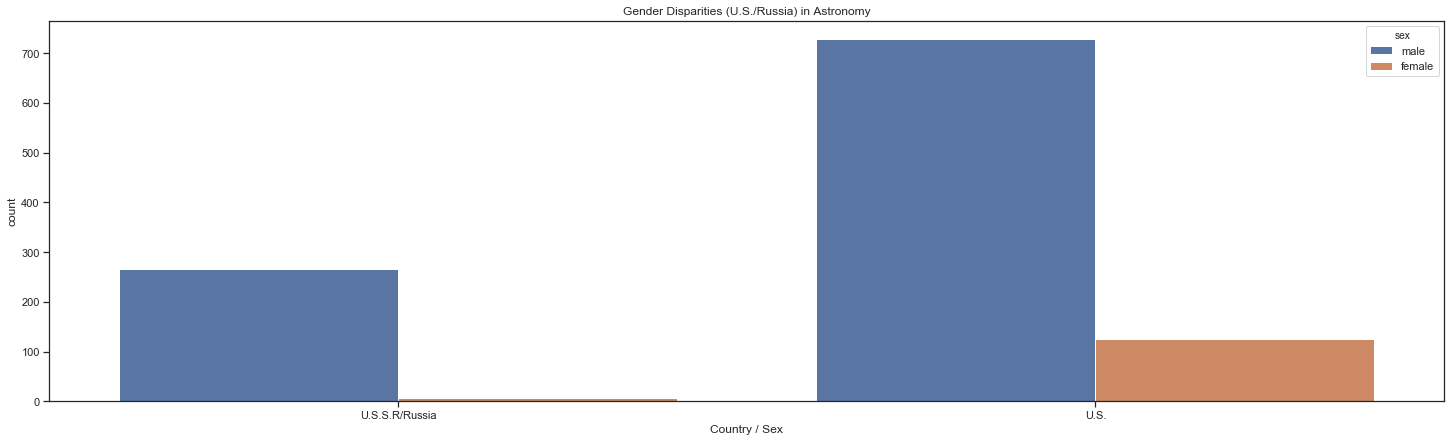

In [26]:
nat_gender = (astronauts["nationality"] == "U.S.") | (astronauts["nationality"] == "U.S.S.R/Russia")
plt.figure(figsize=(25,7))
sb.countplot(x="nationality", hue="sex", data=astronauts[nat_gender]).set(title = "Gender Disparities (U.S./Russia) in Astronomy",
                                                                          xlabel = "Country / Sex");

The gender Disparities in the U.S. and Russia is very similar in ratio were we can see that males are the majority of astronauts in both countries.


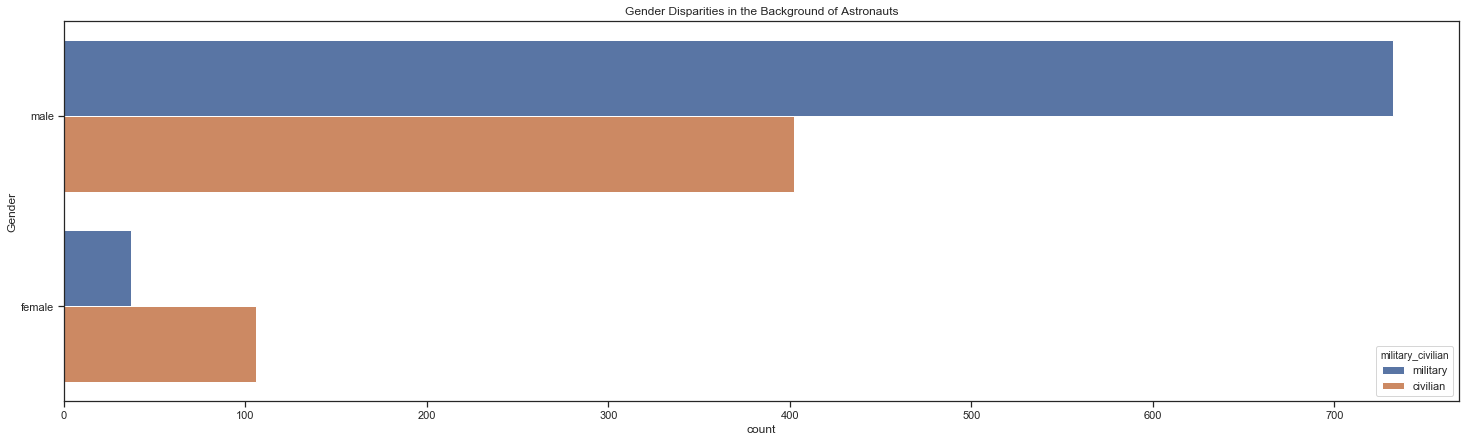

In [27]:
plt.figure(figsize=(25,7))
sb.countplot(y="sex", hue ="military_civilian" ,data=astronauts).set(title = "Gender Disparities in the Background of Astronauts",
                                                                          ylabel = "Gender");

Most males astronauts have military background, while the majority of females astronauts are civilians.

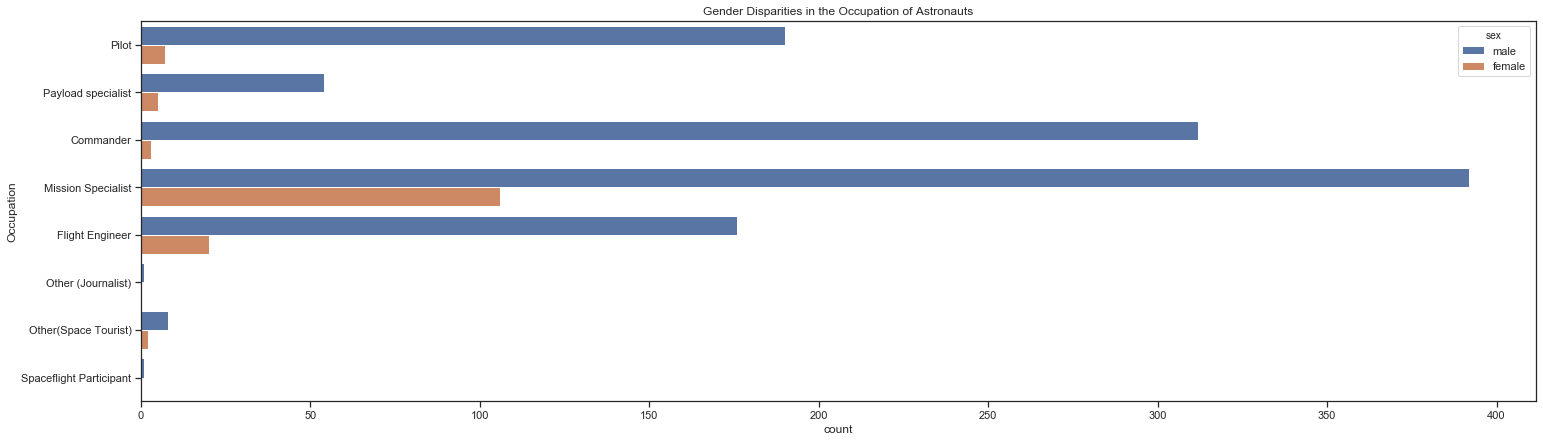

In [28]:
plt.figure(figsize=(25,7))
sb.countplot(y="occupation", hue ="sex" ,data=astronauts).set(title = "Gender Disparities in the Occupation of Astronauts",
                                                              ylabel = "Occupation");

There is no occupation in astronomy were females are more than males.

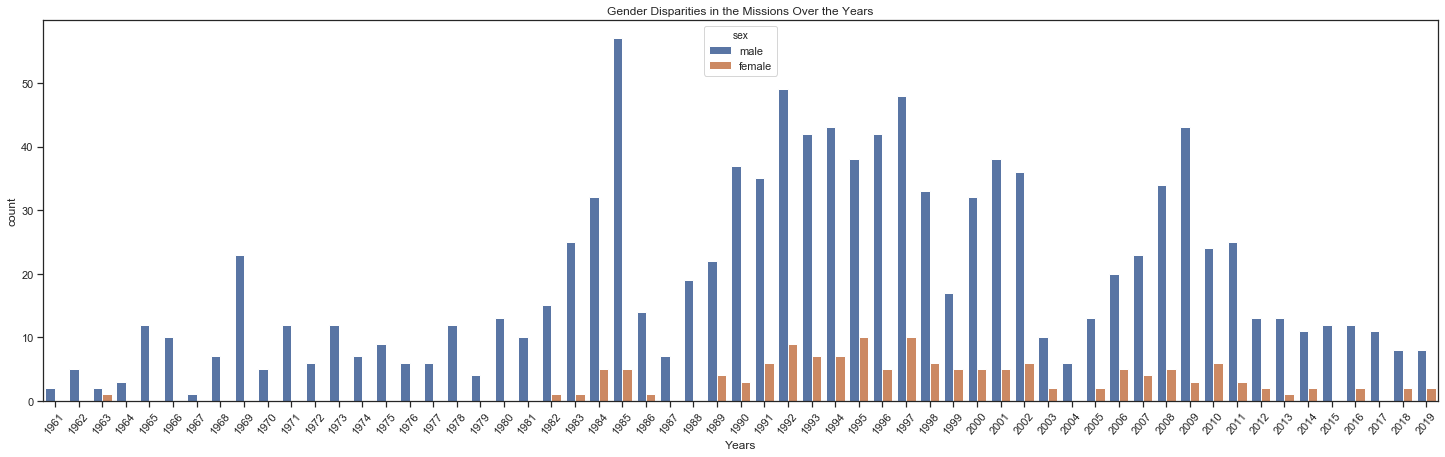

In [29]:
plt.figure(figsize=(25,7))
plt.xticks(rotation=50);
sb.countplot(x="year_of_mission", hue="sex",
           data=astronauts).set(title = "Gender Disparities in the Missions Over the Years",
                                xlabel = "Years");



The early days of astronomy female astronauts were almost not exiting for the first 2 decades.

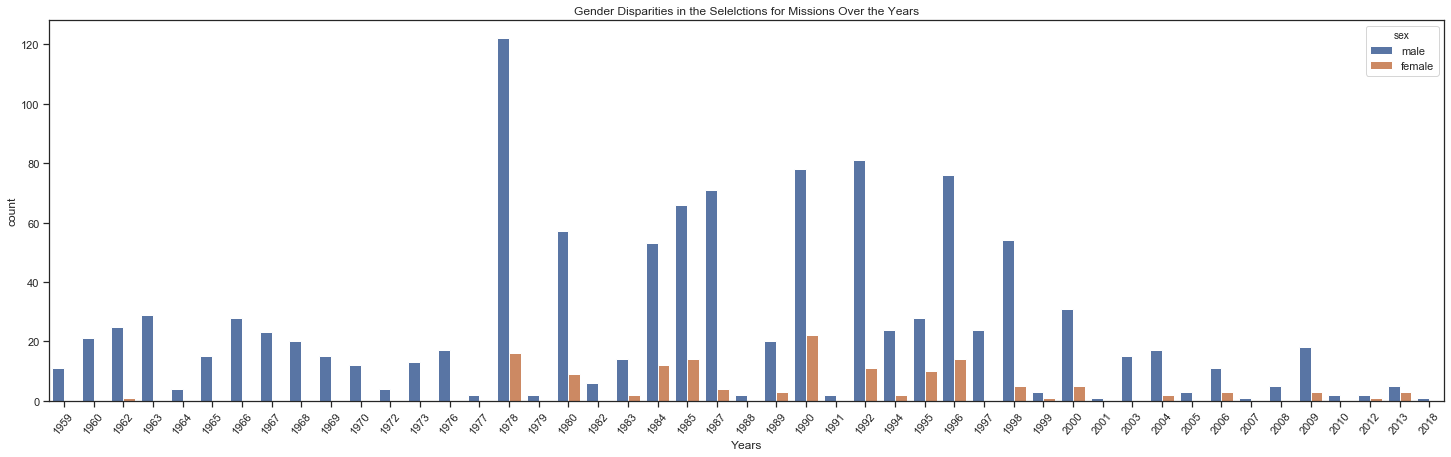

In [30]:
plt.figure(figsize=(25,7))
plt.xticks(rotation=50);
sb.countplot(x="year_of_selection", hue="sex",
           data=astronauts).set(title = "Gender Disparities in the Selelctions for Missions Over the Years",
                                xlabel = "Years");

The same pattern of gender disparities in the year of selection where we can see there were no female astronauts in the early years of astronomy.

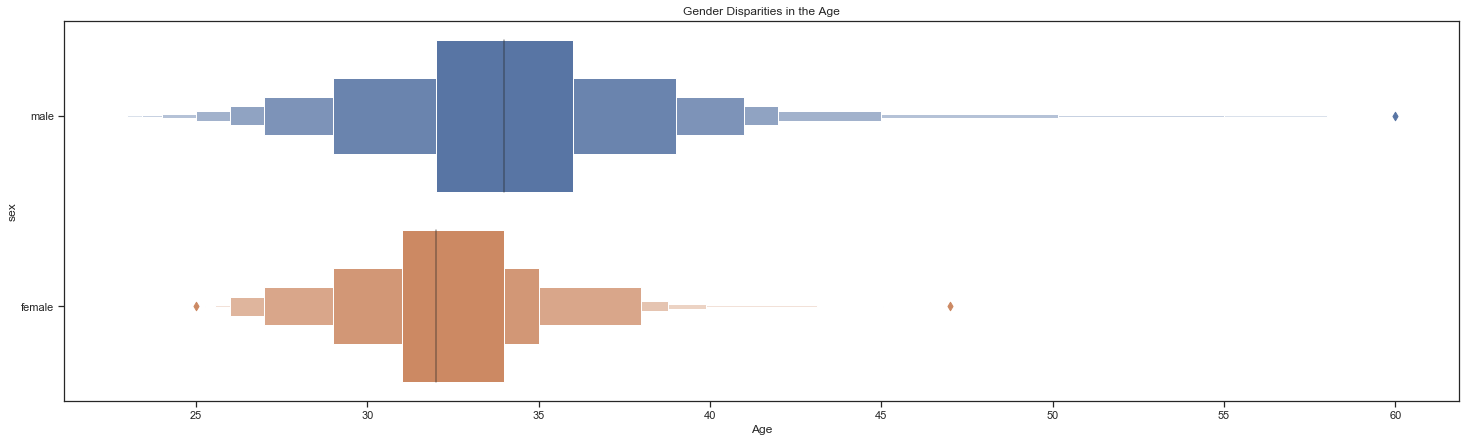

In [31]:
astronauts["sel_age"] = (astronauts["year_of_selection"] - astronauts["year_of_birth"])
plt.figure(figsize=(25,7))
sb.boxenplot(x="sel_age", y="sex", data=astronauts).set(title = "Gender Disparities in the Age",
                                                        xlabel = "Age");

On average, female astronauts were younger than their male counterpart, we can see from the boxplot above that the median age for females is around 31 years  and the median age for males is around 33.5 years, however, male astronauts have a large range in age and the oldest astronaut in the selection years were 60 years old.

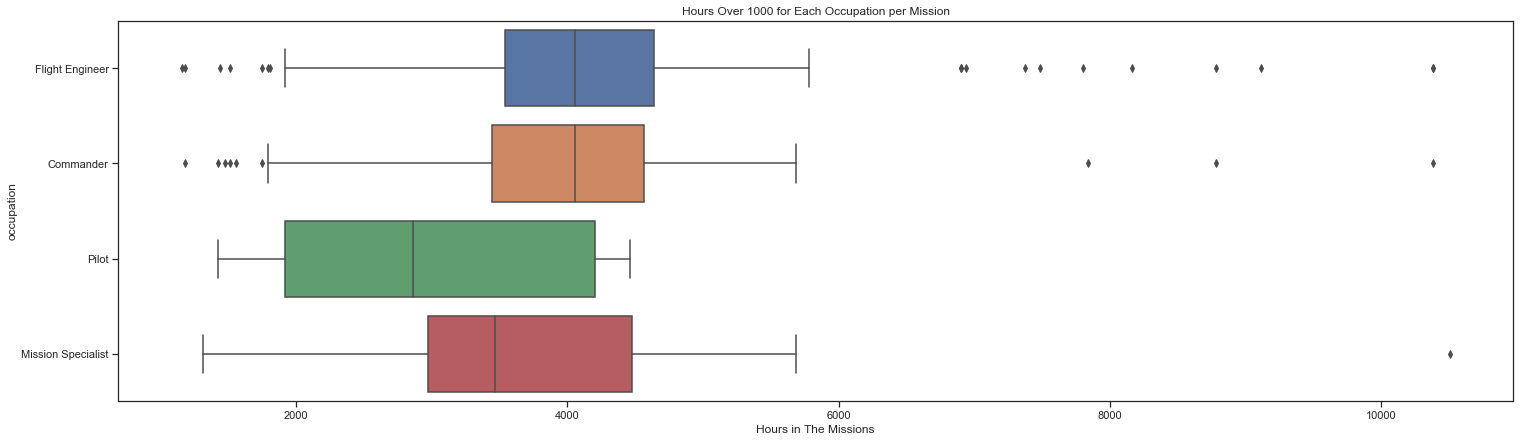

In [32]:
astronauts_hours_mission = (astronauts["hours_mission"] > 1000)
astronauts_hours_mission
plt.figure(figsize=(25,7))
sb.boxplot(x="hours_mission", y ="occupation"
,data=astronauts.loc[astronauts_hours_mission]).set(title = "Hours Over 1000 for Each Occupation per Mission",
                                                    xlabel = "Hours in The Missions");

The time spent for each mission by occupation for over a 1000 hours indicates that almost all occupations are the same except pilots where they seem not spending much time in the mission compared to other occupations.

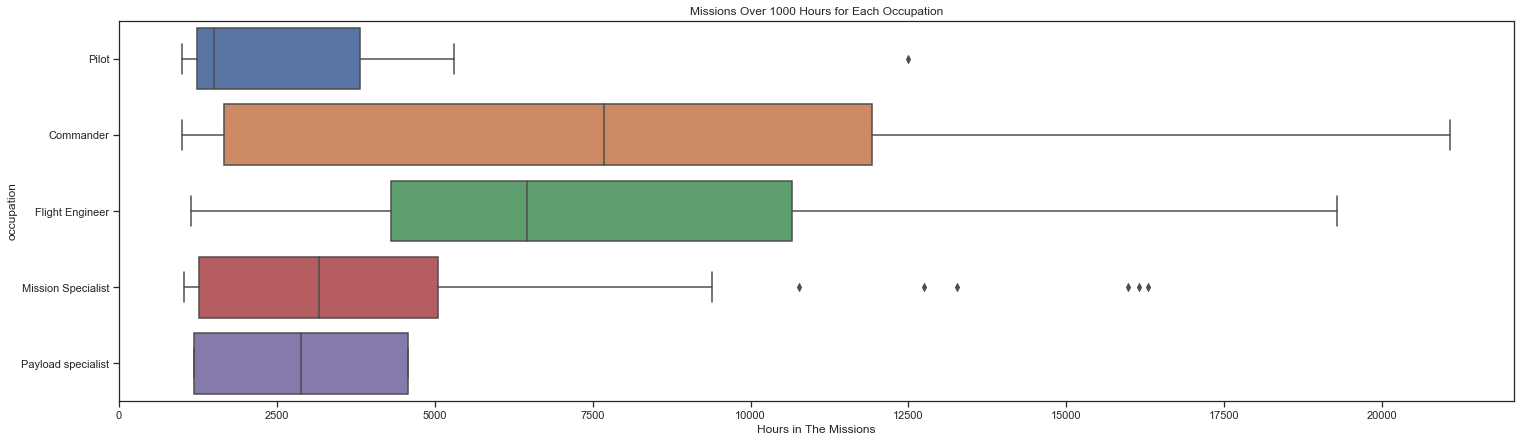

In [33]:
astronauts_total_hrs_sum = (astronauts["total_hrs_sum"] > 1000)
astronauts_total_hrs_sum
plt.figure(figsize=(25,7))
sb.boxplot(x = "total_hrs_sum", y ="occupation",
           data=astronauts.loc[astronauts_total_hrs_sum]).set(title = "Missions Over 1000 Hours for Each Occupation",
                                                    xlabel = "Hours in The Missions");

The total time spent for all missions by occupation for over a 1000 hours showing that commanders and flight engineers are spending a lot of time in mission more than other occupations, and also pilots on average are spending less time in the missions.

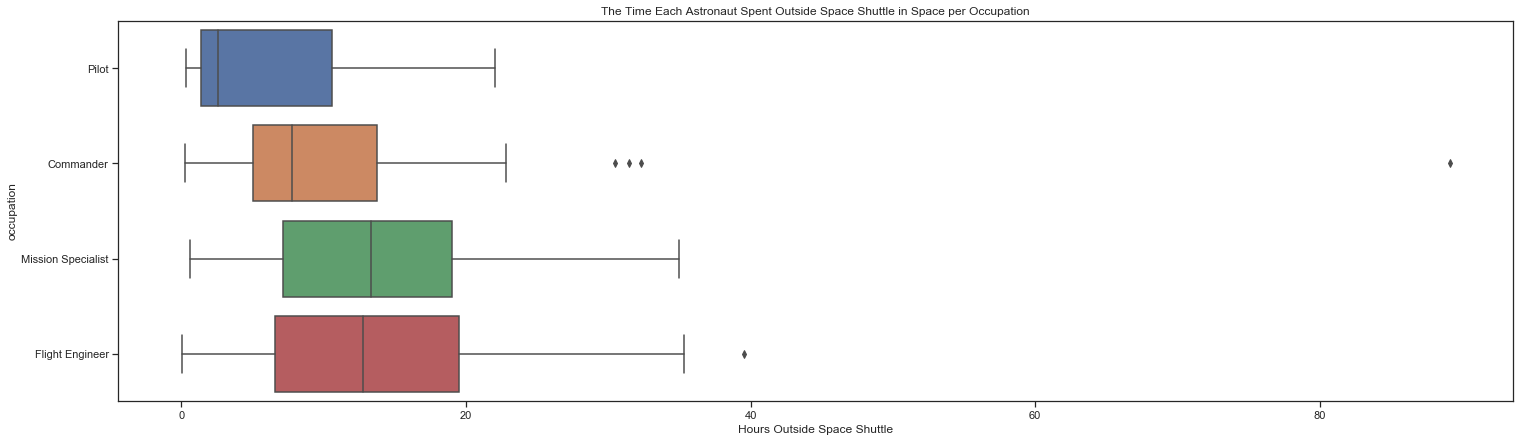

In [34]:
astronauts_eva_hrs_mission = (astronauts["eva_hrs_mission"] > 0)
astronauts_eva_hrs_mission
plt.figure(figsize=(25,7))
sb.boxplot(x="eva_hrs_mission", y ="occupation"
,data=astronauts.loc[astronauts_eva_hrs_mission]).set(title = "The Time Each Astronaut Spent Outside Space Shuttle in Space per Occupation",
                                                      xlabel = "Hours Outside Space Shuttle");

On average Mission specialist and flight engineer occupations seems to have the most time outside a space shuttle in the outer space.Pilots are less likely to spend time outside a space shuttle and the longest time ever spent outside a space shuttle was for a commander.

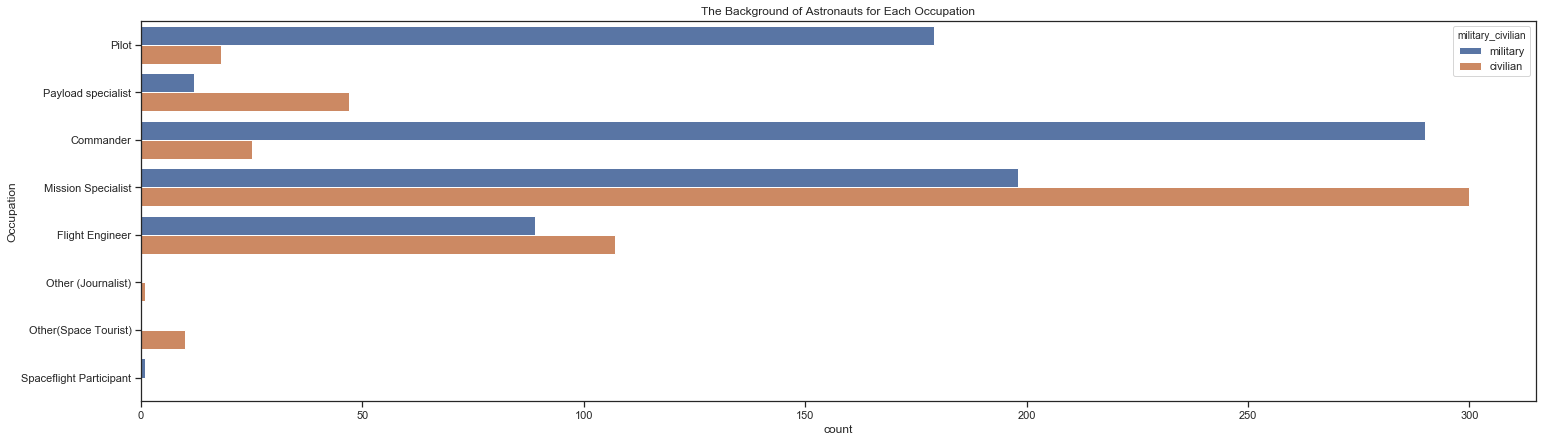

In [35]:
plt.figure(figsize=(25,7))
sb.countplot(y="occupation", hue ="military_civilian",
             data=astronauts).set(title = "The Background of Astronauts for Each Occupation",
                                  ylabel = "Occupation");

Occupation were most astronauts have a military background is "commander" and the occupation with most civilian background is mission specialist, but also we can see that 100% of all journalists and space tourists are civilians too.

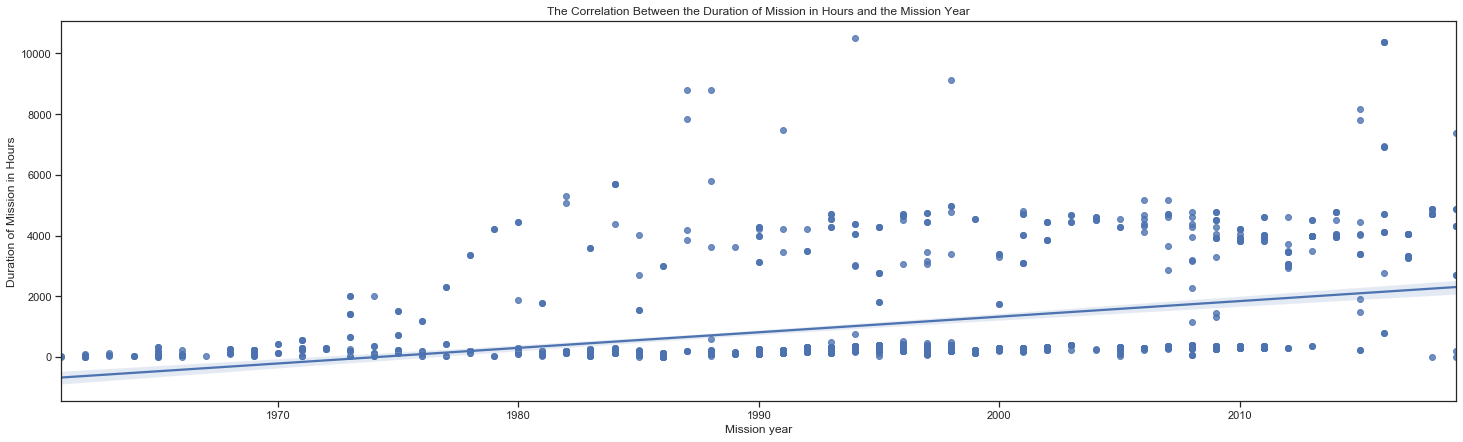

In [36]:
plt.figure(figsize=(25,7))
sb.regplot(x="year_of_mission", y ="hours_mission",
data=astronauts).set(title = "The Correlation Between the Duration of Mission in Hours and the Mission Year",
                                  ylabel = "Duration of Mission in Hours",
                                  xlabel = "Mission year");

There is a positive correlation between the year of the mission and the hours every mission took.

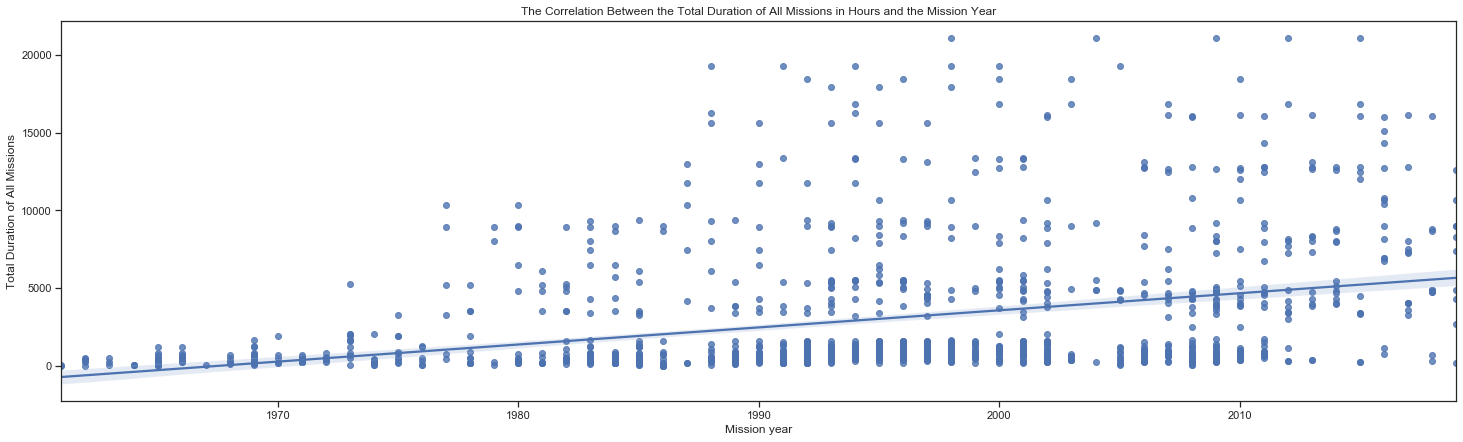

In [37]:
plt.figure(figsize=(25,7))
sb.regplot(x="year_of_mission", y ="total_hrs_sum",
           data=astronauts).set(title = "The Correlation Between the Total Duration of All Missions in Hours and the Mission Year",
                                ylabel = "Total Duration of All Missions",
                                xlabel = "Mission year");

And as expected the same correlation between the year of the mission and the total hours for all missions the positively correlated.

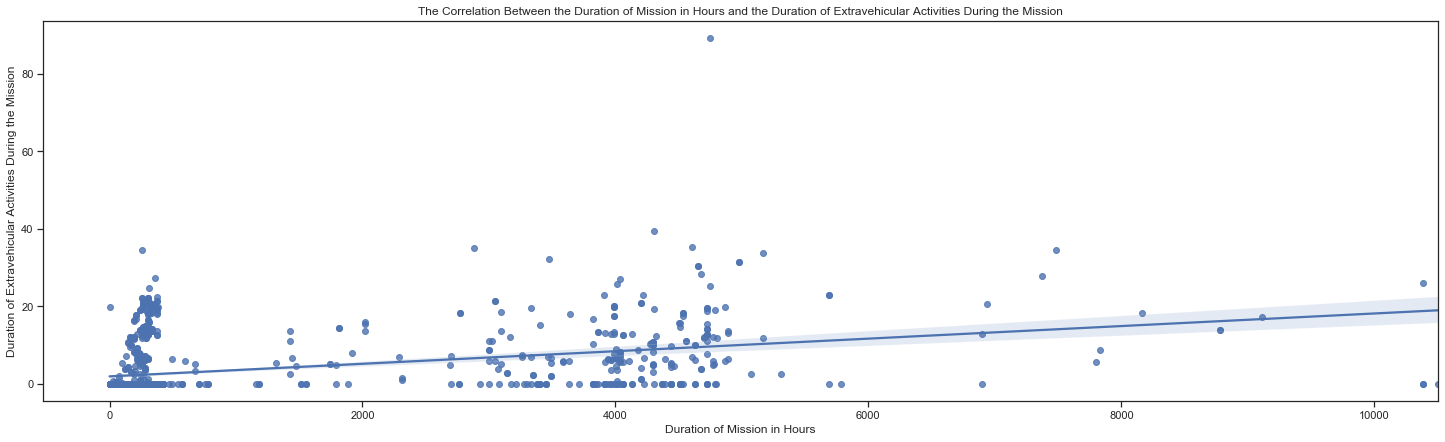

In [38]:
plt.figure(figsize=(25,7))
sb.regplot(x="hours_mission", y ="eva_hrs_mission",
           data=astronauts).set(title = "The Correlation Between the Duration of Mission in Hours and the Duration of Extravehicular Activities During the Mission",
                                xlabel = "Duration of Mission in Hours",
                                ylabel = "Duration of Extravehicular Activities During the Mission");

The correlation between the amount of time spent on a mission and the time spent outside a space shuttle is also positively correlated.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> When it comes to the correlations between the features I did find some positive correlation between the year of the mission and the duration of the missions in general, but this correlation was expected,also the most interesting part of the bivariate exploration is the gender data across other features like nationality and the years of the missions and also occupations and background, the main findings is that female astronauts were not represented equals to their male counterpart in almost every metric in the data.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> When comparing occupations to the background of the astronaut we can see that some occupation like commanders are more likely to have a military background and mission specialists are more likely to be civilians.

## Multivariate Exploration

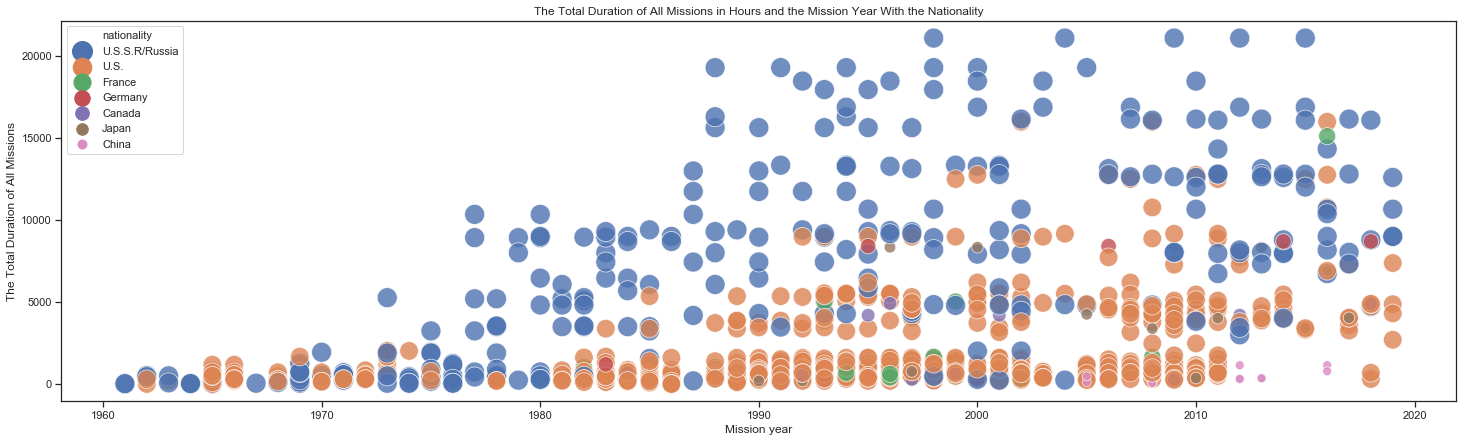

In [39]:
top7Natslist =  astronauts["nationality"].value_counts().nlargest(7).keys().tolist()
top7Natslist
topnats = (astronauts["nationality"].isin(top7Natslist))
topnats
plt.figure(figsize=(25,7))
sb.scatterplot(x="year_of_mission", y ="total_hrs_sum",
               hue = "nationality",size="nationality",sizes=(80,400), alpha=.8,
               data=astronauts.loc[topnats]).set(title = "The Total Duration of All Missions in Hours and the Mission Year With the Nationality",
                                                 ylabel = "The Total Duration of All Missions",
                                                 xlabel = "Mission year");

From early on to the recent years the U.S. and U.S.S.R/Russia are making most missions in space, however, we can see from the plot above that Russia is spending more time than the U.S. in the missions, but other nations are starting to catch up with the U.S. and Russia and starting to make more longer missions to the space. 

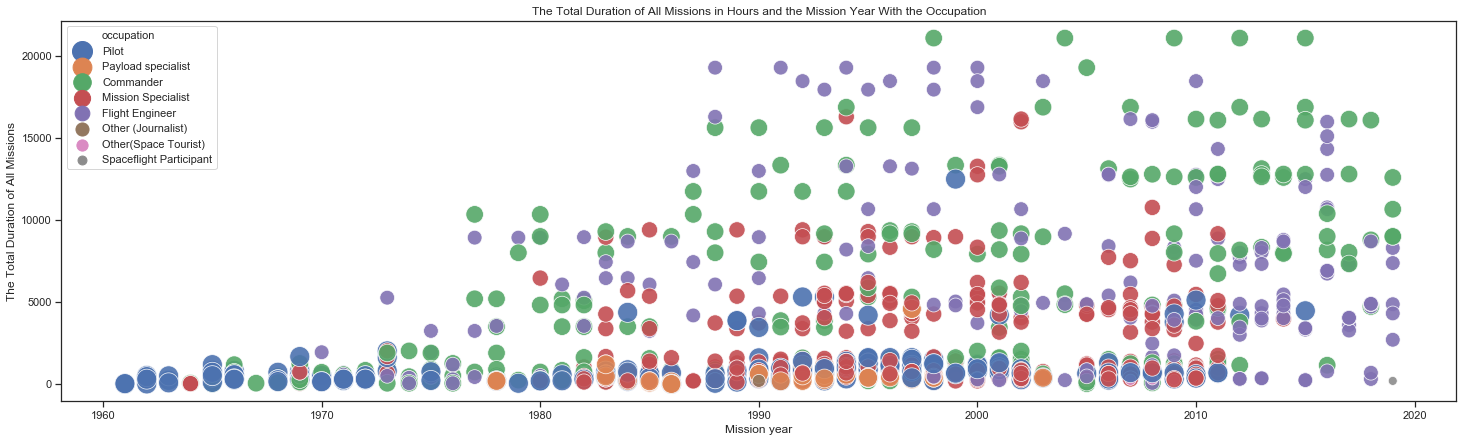

In [40]:
plt.figure(figsize=(25,7))
sb.scatterplot(x="year_of_mission", y ="total_hrs_sum",
               hue = "occupation",size="occupation",sizes=(80,400), alpha=.9,
               data=astronauts).set(title = "The Total Duration of All Missions in Hours and the Mission Year With the Occupation",
                                                 ylabel = "The Total Duration of All Missions",
                                                 xlabel = "Mission year");

The most common occupations for the missions is changing over time, but recently commanders and flight engineers are the most common occupation for the missions and commanders spending more time in the missions and flight engineers more than any occupation.

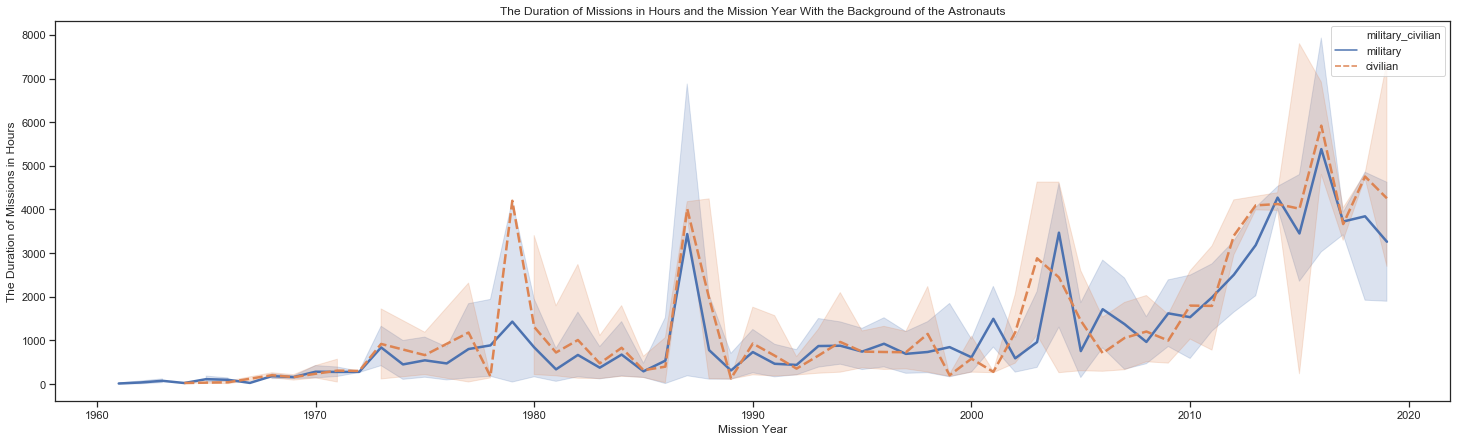

In [41]:
plt.figure(figsize=(25,7))
sb.lineplot(x="year_of_mission", y ="hours_mission",
               hue = "military_civilian",style="military_civilian",linewidth=2.5,
               data=astronauts).set(title = "The Duration of Missions in Hours and the Mission Year With the Background of the Astronauts",
                                    ylabel = "The Duration of Missions in Hours",
                                    xlabel = "Mission Year");

The time series above shows that early on, most astronauts were of a military background, then civilians started to join in the mission, but recently civilians are the majority of the astronauts.

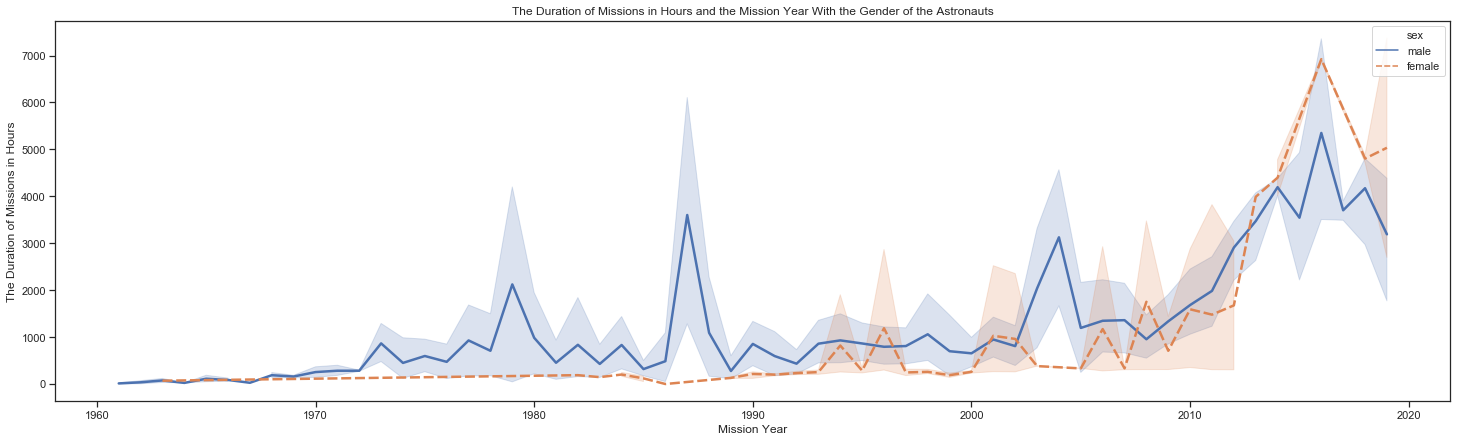

In [42]:
plt.figure(figsize=(25,7))
sb.lineplot(x="year_of_mission", y ="hours_mission",
               hue = "sex",style="sex",linewidth=2.5,
               data=astronauts).set(title = "The Duration of Missions in Hours and the Mission Year With the Gender of the Astronauts",
                                    ylabel = "The Duration of Missions in Hours",
                                    xlabel = "Mission Year");

In this  time series, we can see that in recent years there are more female astronauts than males in the longer missions compared to the early years of the space program.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The relationship between the total duration of the missions for each year is positively correlated, but when we add the nationality to the plot we can find some interesting findings like how Russia is still making longer mission than the U.S. and how other countries is catching up with the U.S. and Russia.

### Were there any interesting or surprising interactions between features?

> The surprising findings is that recently or to be specific after 2010 we can find that female astronauts are now more repressed in the field and sometimes they do longer mission than males in the last decade.